In [1]:
from results_utils import *
import itertools
import pickle

temp = [0.2, 1.0, 1.10]
reasoning = [True, False]
entailment = [Entail.GPT]

combinations = list(itertools.product(temp, reasoning, entailment))
combinations  = [Result(temp=c[0], reasoning=c[1], entailment=c[2]) for c in combinations]

results = Results(combinations, dataset_path="/home/jahanpd/Jahan_Subset_v2.csv")

./data/openai_gpt_temp=0.2_reas=True_agg=original_final_results.pkl


/home/jahanpd/envs/llm/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


./data/openai_gpt_temp=0.2_reas=False_agg=original_final_results.pkl


/home/jahanpd/envs/llm/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


./data/openai_gpt_temp=1.0_reas=True_agg=original_final_results.pkl
./data/openai_gpt_temp=1.0_reas=False_agg=original_final_results.pkl


/home/jahanpd/envs/llm/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/home/jahanpd/envs/l

./data/openai_gpt_temp=1.1_reas=True_agg=original_final_results.pkl
./data/openai_gpt_temp=1.1_reas=False_agg=original_final_results.pkl


/home/jahanpd/envs/llm/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/home/jahanpd/envs/l

In [2]:
df = results.get_results_df()

In [3]:
# The effect of temperature
df[(df.entailment == Entail.GPT) &
   (df.metric == 'entropy') &
   (df.part == 'full') &
   (df.reasoning == False)
   ]

,temp,reasoning,entailment,metric,part,acc,auc
9,0.2,False,Entail.GPT,entropy,full,0.556469,0.725373
27,1.0,False,Entail.GPT,entropy,full,0.515351,0.782465
45,1.1,False,Entail.GPT,entropy,full,0.505482,0.793878


In [4]:
# The effect of reasoning across parts
df[(df.entailment == Entail.GPT) &
   (df.metric == 'entropy') &
   (df.temp == 1.0)
   ].sort_values('part')

,temp,reasoning,entailment,metric,part,acc,auc
18,1.0,True,Entail.GPT,entropy,full,0.526864,0.773046
27,1.0,False,Entail.GPT,entropy,full,0.515351,0.782465
21,1.0,True,Entail.GPT,entropy,part1,0.547445,0.750346
30,1.0,False,Entail.GPT,entropy,part1,0.547445,0.767622
24,1.0,True,Entail.GPT,entropy,part2,0.448763,0.740225
33,1.0,False,Entail.GPT,entropy,part2,0.433451,0.754028


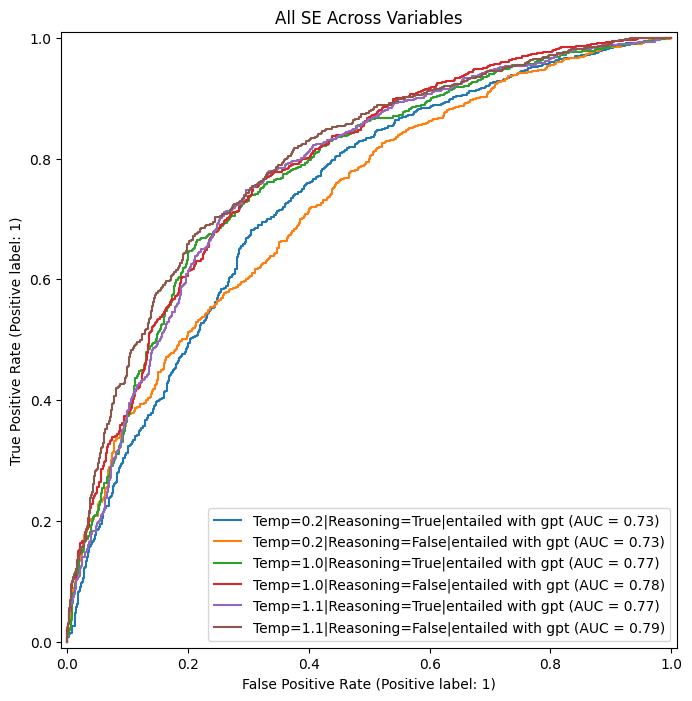

In [5]:
results.plot_aurocs_sem_ent_full_gpt()

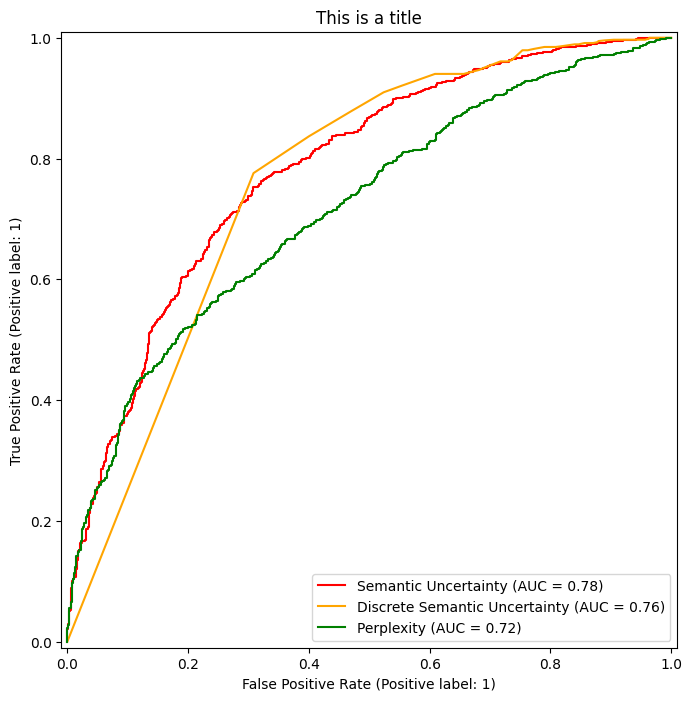

In [6]:
# temp 1 | entailment GPT | no reasoning
results.plot_aurocs_metrics_standard("AUROC (temp=1;LLM entailment;no reasoning)")